In [1]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.io import loadmat

code reference: https://www.geeksforgeeks.org/locally-weighted-linear-regression-using-python/

Q4.2

In [4]:
#load the dataset
data = loadmat('data/data.mat')
X = data['data'][:,0:1]
y = data['data'][:,1:]

In [5]:
#Gaussian kernel function
def gaussian_kernel(x, X, h):
    distances_squared = np.sum((X - x)**2, axis=1)
    weights = np.exp(-distances_squared / (2 * h**2)) / (np.sqrt(2 * np.pi) * h)
    return weights

In [6]:
#locally weighted linear regression function, where h is the bandwith, x is the predition point
def lwlr(x, X, y, h):
    n, p = X.shape 
    X_with_intercept = np.hstack((np.ones((n, 1)), X))
    weights = gaussian_kernel(x, X, h)
    W = np.diag(weights)  
    XtW = X_with_intercept.T @ W 
    XtWX = XtW @ X_with_intercept  
    XtWY = XtW @ y  
    beta = np.linalg.solve(XtWX, XtWY)
    x_with_intercept = np.hstack((1, x))  
    y_pred = x_with_intercept @ beta  
    return y_pred, beta

In [7]:
#5-fold
def cvlwr(X, y, h_values):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    mean_cv_errors = []
    for h in h_values:
        fold_errors = []
        for train_index, val_index in kfold.split(X):
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            errors = [
                (y_val[i] - lwlr(X_val[i], X_train, y_train, h)[0])**2
                for i in range(len(X_val))
            ]
            fold_errors.append(np.mean(errors))
        mean_cv_errors.append(np.mean(fold_errors))
    return mean_cv_errors

h_values = np.linspace(0.1, 2.0, 20)
cv_errors = cvlwr(X, y, h_values)  
optimal_bandwidth = h_values[np.argmin(cv_errors)]
print(f"Optimal bandwidth is {optimal_bandwidth}")

Optimal bandwidth is 0.2


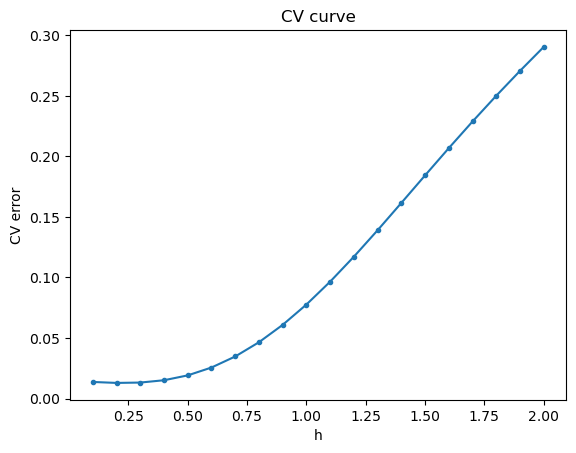

In [8]:
plt.plot(h_values, cv_errors, marker='.')
plt.xlabel('h')
plt.ylabel('CV error')
plt.title('CV curve')
plt.savefig('Q4.1.CV curve.png', bbox_inches='tight')
plt.show()

Q4.3

In [10]:
X.min()

-4.0

In [11]:
X.max()

4.0

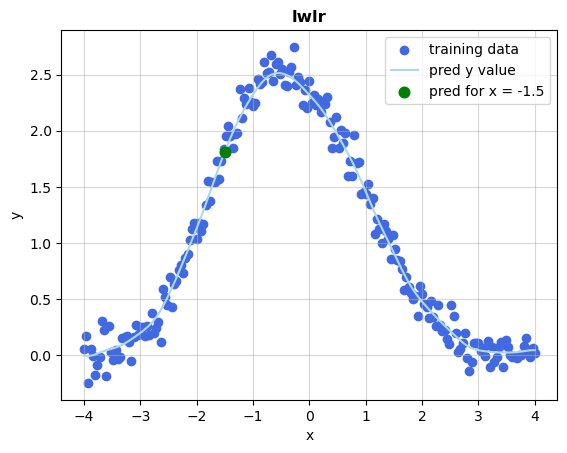

In [12]:
pred_point = -1.5
y_pred = lwlr(-1.5, X, y, 0.2)[0]
plt.scatter(X, y, color='royalblue', label='training data')
x_range = np.linspace(-4, 4, 100)
y_range = [lwlr(x_value, X, y, 0.2)[0] for x_value in x_range]
plt.plot(x_range, y_range, color='lightblue', label='pred y value')
plt.scatter(-1.5, y_pred, color='green', label=f'pred for x = -1.5', s=58, zorder=5)
plt.title('lwlr',fontweight='bold')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', frameon=True)
plt.grid(True, alpha=0.5)
plt.savefig('Q4.2.png', dpi=300, bbox_inches='tight')
plt.show()